## API'leri Kullanarak İş Verilerini Toplama
Tahmini süre: 30 dakika

# Hedefler
Bu laboratuvar çalışmasını tamamladıktan sonra şunları yapabileceksiniz:

Jobs API'sini kullanarak iş verilerini toplamak
Toplanan verileri bir Excel elektronik tablosuna kaydetmek.

# Not: Ödev işlemine başlamadan önce tüm talimatları okuduğunuzdan emin olun ve ardından kodlama bölümüne geçin.

# Talimatlar
Laboratuvar çalışmasını çalıştırmak için öncelikle [Jobs_API](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Jobs_API.ipynb) bağlantısına tıklamanız gerekir. Dosya, Jobs API verilerini çalıştırmak için gerekli olan Flask kodunu içerir.

Şimdi, açılan dosyadaki kodu çalıştırmak için aşağıdaki adımları izleyin.

Adım 1: Dosyayı indirin.

Adım 2: Jupyter arayüzünüzdeki yükleme düğmesini kullanarak dosyayı mevcut Jupyter ortamınıza yükleyin. Dosyanın, çalışma .ipynb dosyanızla aynı klasörde olduğundan emin olun.

Adım 2: Yerel bir Jupyter ortamında çalışıyorsanız, Jobs_API not defterini mevcut .ipynb dosyanızla aynı klasöre yüklemek için Jupyter arayüzünüzdeki "Yükle" düğmesini kullanın.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Upload.PNG">

3. Adım: Jobs_API not defterini açın ve Flask uygulamasını başlatmak için tüm hücreleri çalıştırın. Sunucu çalışmaya başladıktan sonra, not defterinde verilen URL'den API'ye erişebilirsiniz.

İsteğe bağlı olarak Flask hakkında daha fazla bilgi edinmek isterseniz, bu bağlantıya tıklayabilirsiniz: [buraya](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/FLASK_API.md.html).

Flask kodunu çalıştırdıktan sonra ödevinize başlayabilirsiniz.

# Bu Ödevde Kullanılan Veri Seti
Bu laboratuvar çalışmasında kullanılan veri seti, Kamu Malı lisansı altında şu kaynaktan alınmıştır: https://www.kaggle.com/promptcloud/jobs-on-naukricom

Not: Laboratuvar çalışması için bu veri setinin değiştirilmiş bir alt kümesini kullanıyoruz, bu nedenle laboratuvar talimatlarını başarıyla takip etmek için lütfen orijinal kaynaktan alınan veri seti yerine laboratuvarla birlikte verilen veri setini kullanın.

Orijinal veri seti bir CSV dosyasıdır. Laboratuvarın gereksinimine göre CSV dosyasını JSON'a dönüştürdük.

# Isınma Egzersizi
Gerçek laboratuvar çalışmasına başlamadan önce, API'ye nasıl erişeceğinizi öğrenmenize yardımcı olacak, tamamen çözülmüş bir ısınma egzersizi aşağıda verilmiştir.

Bir API kullanarak, şu anda Uluslararası Uzay İstasyonu'nda (ISS) kimlerin olduğunu bulalım.
http://api.open-notify.org/astros.json adresindeki API, bize ISS'de bulunan astronotların bilgilerini JSON formatında veriyor.
Bu API hakkında daha fazla bilgiyi http://open-notify.org/Open-Notify-API/People-In-Space/ adresinde bulabilirsiniz.

In [1]:
import requests
import pandas as pd

In [2]:
api_url="http://api.open-notify.org/astros.json"  ## Bu URL bize astronot verilerini veriyor.

In [3]:
response = requests.get(api_url)  # API'yi get metodu kullanarak çağırın ve
#API çağrısının çıktısını response adlı bir değişkene kaydedin.

In [4]:
if response.ok:
    data = response.json()
    # Her şey yolundaysa (hata yoksa, ağ zaman aşımı yoksa)
#data = response.json() # Sonucu JSON formatında data adlı bir değişkene kaydedin
# data değişkeni sözlük türündedir.

In [5]:
print(data)   ## Çıktıyı kontrol etmek veya hata ayıklamak için verileri yazdırın

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Li Guangsu'}, {'craft': 'Tiangong', 'name': 'Li Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}], 'number': 12, 'message': 'success'}


In [6]:
# Şu anda Uluslararası Uzay İstasyonu'nda bulunan astronot sayısını yazdırın.

In [7]:
print(data.get('number'))

12


In [8]:
# Şu anda Uluslararası Uzay İstasyonu'nda bulunan astronotların isimlerini yazdırın.

In [9]:
astronauts = data.get('people')
print("There are {} astonauts ın ISS" .format(len(astronauts)))
print("And their names are: " )
for astronaut in astronauts:
    print(astronaut.get('name'))

There are 12 astonauts ın ISS
And their names are: 
Oleg Kononenko
Nikolai Chub
Tracy Caldwell Dyson
Matthew Dominick
Michael Barratt
Jeanette Epps
Alexander Grebenkin
Butch Wilmore
Sunita Williams
Li Guangsu
Li Cong
Ye Guangfu


In [10]:

# Umarım ısınma egzersizleri faydalı olmuştur. Bir sonraki laboratuvar çalışmanızda başarılar!

# Laboratuvar Çalışması:
İş İlanları API'sini Kullanarak İş Verilerini Toplama
Amaç: Çeşitli teknolojiler ve çeşitli lokasyonlar için şu anda açık olan iş ilanlarının sayısını belirlemek
Aşağıdaki lokasyonlar için API'yi kullanarak iş ilanlarının sayısını toplayın:

Los Angeles <hr>
New York<hr>
San Francisco<hr>
Washington DC<hr>
Seattle<hr>
Austin<hr>
Detroit

https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json#### Python teknolojisi için iş sayısını almak üzere bir fonksiyon yazın.

Not: Laboratuvarı kullanırken, params özniteliği için anahtar-değer çiftleri şeklinde yük bilgilerini iletmeniz gerekir. Veri Bilimi, Yapay Zeka ve Geliştirme için Python kursundaki notlandırılmamış REST API laboratuvarına bakın.

JSON dosyasındaki anahtarlar şunlardır:

İş Unvanı

Gerekli İş Deneyimi

Temel Beceriler

Rol Kategorisi

Konum

Fonksiyonel Alan

Sektör

Rol

Aşağıdaki JSON URL'sinden de JSON dosyasının içeriğini görüntüleyebilirsiniz.

In [11]:
api_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"

In [12]:
def get_number_of_jobs_T(technology):
    # Bizim kendi API adresi (Flask çalışıyor olmalı!)
    api_url = "http://127.0.0.1:5000/data"
    # API'ye "Key Skills" içinde aradığımız teknolojiyi gönderiyoruz
    payload = {"Key Skills": technology}
    
    try:
        response = requests.get(api_url, params=payload)# İsteği atıyoruz
        if response.status_code == 200:
            data = response.json()
            # Gelen listenin uzunluğu, o işin kaç tane olduğunu verir
            number_of_jobs = len(data)
        else:
            # Eğer 200 dönmezse (başarısızsa) 0 ver
            number_of_jobs = 0
    except Exception as e:
        # Eğer sunucu kapalıysa veya bir hata olursa buraya düşer
        print(f"Hata: {e}")
        number_of_jobs = 0
        
    return technology, number_of_jobs

Python fonksiyonunu çağırıp çalışıp çalışmadığını kontrol etmek.

In [13]:
get_number_of_jobs_T("Python")

('Python', 1173)

## Seçtiğiniz bir konum için ABD'deki iş sayısını bulan bir fonksiyon yazın.

In [14]:
def get_number_of_jobs_L(location):
    
    api_url = "http://127.0.0.1:5000/data"
    payload = {"Location": location}
    try:
        response =  requests.get(api_url, params=payload)
        if response.status_code == 200:
            data = response.json()
            number_of_jobs = len(data)
        else:
            number_of_jobs = 0
    except Exception as e:
        print(f"Hata: {e}")
        number_of_jobs = 0

    return location, number_of_jobs

Los Angeles için ilgili fonksiyonu çağırın ve çalışıp çalışmadığını kontrol edin.

In [18]:
get_number_of_jobs_L("Los Angeles")

('Los Angeles', 640)

## Sonuçları bir Excel dosyasına kaydedin.
Yukarıda verilen tüm teknolojiler için API'yi çağırın ve sonuçları bir Excel elektronik tablosuna yazın.

Python kullanarak Excel dosyası oluşturmayı bilmiyorsanız, ipuçları için buraya çift tıklayın.

İş ilanlarının sayısını bulmanız gereken tüm teknolojilerin bir Python listesini oluşturun.

In [19]:
# [24]: İş ilanlarının sayısını bulmanız gereken tüm lokasyon bir listesini oluşturun.
locations = ["Los Angeles", "New York", "San Francisco", "Washington DC", "Seattle", "Austin", "Detroit"]

Excel elektronik tablosu oluşturmak için gerekli kütüphaneleri içe aktarmak gerekiyor.

In [20]:
# [25]: Excel elektronik tablosu oluşturmak için gerekli kütüphaneleri içe aktarmak gerekiyor.
!pip install openpyxl
from openpyxl import Workbook


Bir çalışma kitabı oluşturun ve etkin çalışma sayfasını seçin.

In [21]:
wb = Workbook()
ws = wb.active
print("Kütüpnane başarıyla yuklendi ve calışma kitabı oluşturuldu!.")

Kütüpnane başarıyla yuklendi ve calışma kitabı oluşturuldu!.


Yukarıdaki listede yer alan her bir teknoloji için ilan sayısını bulun. Teknoloji adını ve ilan sayısını Excel tablosuna yazın.

In [22]:
# [27]: Her bir lokasyon için ilan sayısını bulup ve Excel tablosuna yazcaz.
#teknoloji için yukarda olusturmustum oncecen sistemi o fonskiyona carcaz

# Başlık satırını ekleyelim
ws.append(["Location", "Number of job jobs"])

for loc in locations:
    # API fonksiyonunu çağırarak ilan sayısını alıyoruz
    result = get_number_of_jobs_L(loc)
    # Sonucu (Teknoloji Adı, İlan Sayısı) olarak Excel'e ekliyoruz
    if result:
        ws.append([loc, result[1]])
        print(f"{loc} için {result[1]} ilan bulundu.")
    else:
        ws.append([tech, 0])
        print(f"{loc} için sonuç bulunamadı.")
        
print("\n Veriler başarıyla Excel sayfasına işlendi.")        

Los Angeles için 640 ilan bulundu.
New York için 3226 ilan bulundu.
San Francisco için 435 ilan bulundu.
Washington DC için 5316 ilan bulundu.
Seattle için 3375 ilan bulundu.
Austin için 434 ilan bulundu.
Detroit için 3945 ilan bulundu.

 Veriler başarıyla Excel sayfasına işlendi.



# Dosyayı job-postings.xlsx adıyla Excel elektronik tablosuna kaydedin.

In [23]:
wb.save("job-posting.xlsx")
print("Dosya 'job-postings.xlsx' adıyla başarıyla kaydedildi!")

Dosya 'job-postings.xlsx' adıyla başarıyla kaydedildi!



Benzer şekilde, aşağıda verilen teknolojileri deneyebilir ve sonuçları bir Excel sayfasına kaydedebilirsiniz.

Aşağıdaki diller için API kullanarak iş ilanlarının sayısını toplayın:

C
C#
C++
Java
JavaScript
Python
Scala
Oracle
SQL Server
MySQL Server
PostgreSQL
MongoDB

In [24]:
technologies = [
    'C', 'C#', 'C++', 'Java', 'JavaScript', 'Python', 
    'Scala', 'Oracle', 'SQL Server', 'MySQL Server', 
    'PostgreSQL', 'MongoDB'
]

# 2. Excel dosyasını (Workbook) oluşturuyoruz
wb = Workbook()
ws = wb.active
ws.title = "Technology Jobs" # Sayfa adını belirliyoruz
ws.append(["Technology", "Number of Jobs"]) # Başlık satırı

# 3. Döngü ile her teknolojiyi API'ye soruyoruz
for tech in technologies:
    # Daha önce yazdığın fonksiyonu kullanıyoruz
    technology_name, job_count = get_number_of_jobs_T(tech)
    
    # Sonucu Excel'e satır olarak ekliyoruz
    ws.append([technology_name, job_count])
    print(f"{technology_name} için {job_count} iş bulundu.")

# 4. Dosyayı kaydediyoruz
wb.save("technology-job-data.xlsx")

print("\nExcel dosyası başarıyla oluşturuldu!")

C için 13498 iş bulundu.
C# için 333 iş bulundu.
C++ için 305 iş bulundu.
Java için 2609 iş bulundu.
JavaScript için 355 iş bulundu.
Python için 1173 iş bulundu.
Scala için 33 iş bulundu.
Oracle için 784 iş bulundu.
SQL Server için 250 iş bulundu.
MySQL Server için 0 iş bulundu.
PostgreSQL için 10 iş bulundu.
MongoDB için 174 iş bulundu.

Excel dosyası başarıyla oluşturuldu!


In [25]:
import pandas as pd
df = pd.read_excel("technology-job-data.xlsx")
df

,Technology,Number of Jobs
0,C,13498
1,C#,333
2,C++,305
3,Java,2609
4,JavaScript,355
5,Python,1173
6,Scala,33
7,Oracle,784
8,SQL Server,250
9,MySQL Server,0


In [ ]:
#SUNUM PROJESİ İÇİN GEREKLİ EXTRA

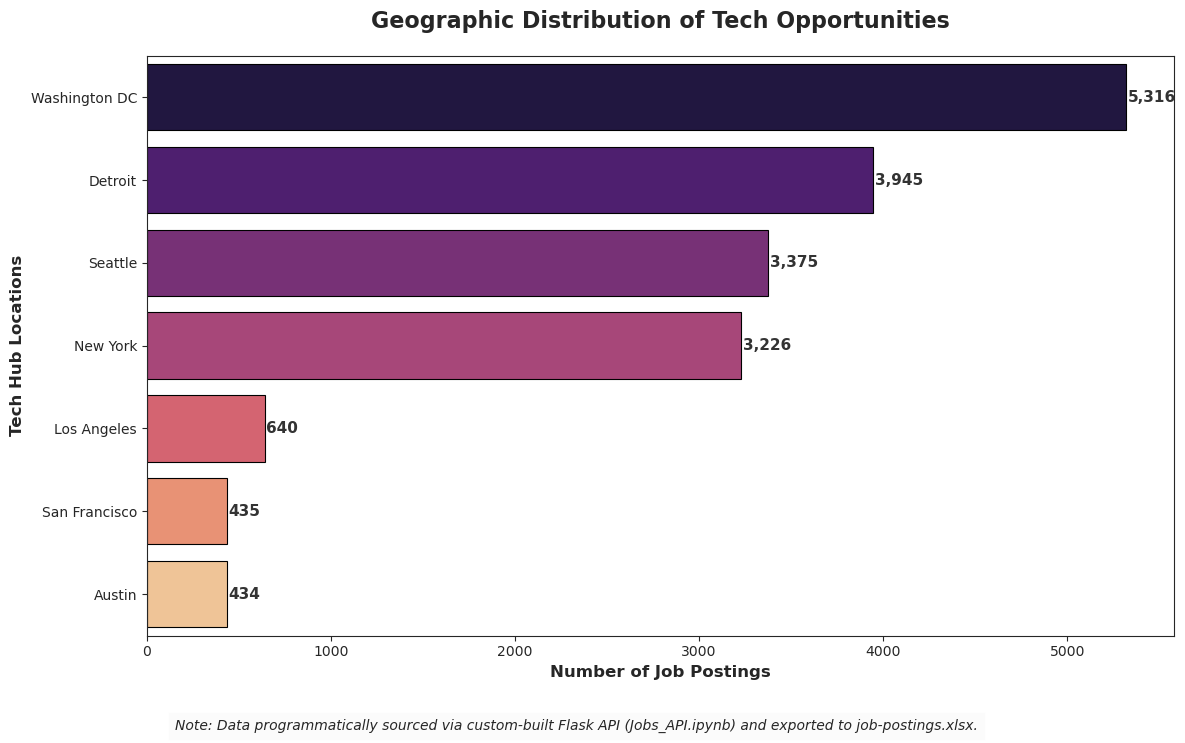

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns

# 1. API URL'i (Jobs_API.ipynb çalıştığında bu adreste olur)
base_url = "http://127.0.0.1:5000/data"

# 2. Lokasyon listesi
locations = ["Washington DC", "Detroit", "Seattle", "New York", "Austin", "Los Angeles", "San Francisco"]

def get_job_counts(loc_list):
    results = []
    for loc in loc_list:
        # API'ye istek gönderiyoruz
        response = requests.get(base_url, params={"Location": loc})
        if response.status_code == 200:
            data = response.json()
            results.append({"Location": loc, "Job_Count": len(data)})
    return results

# 3. Veriyi çek ve DataFrame yap
job_data = get_job_counts(locations)
df = pd.DataFrame(job_data)

# 4. EXCEL'E KAYDET (Yönerge Şartı 1)
df.to_excel("job-postings.xlsx", index=False)



# 1. Veriyi hazırla (Zaten sıralamıştık ama garantiye alalım)
df_sorted = df.sort_values(by='Job_Count', ascending=False)

# 2. Görselleştirme Ayarları
plt.figure(figsize=(12, 7))
sns.set_style("ticks") # Daha profesyonel, temiz bir arka plan

# 3. Grafik Oluşturma (Modern 'Magma' renk paleti ile)
ax = sns.barplot(
    x='Job_Count', 
    y='Location', 
    data=df_sorted, 
    palette='magma',
    edgecolor='black',
    linewidth=0.8
)

# 4. Çubukların ucuna rakamları ekleyelim
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 10,       # Rakamın çubuktan uzaklığı
        p.get_y() + p.get_height() / 2, # Dikey ortalama
        '{:,.0f}'.format(width), # Formatlı rakam
        ha='left', 
        va='center', 
        fontsize=11, 
        fontweight='bold',
        color='#333333'
    )

# 5. Başlık ve Etiketler
plt.title('Geographic Distribution of Tech Opportunities', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Job Postings', fontsize=12, fontweight='bold')
plt.ylabel('Tech Hub Locations', fontsize=12, fontweight='bold')

# 6. 
# Slayt 5'teki metodoloji ile bağlantı kuran o kritik not:
plt.figtext(0.15, -0.05, 
            "Note: Data programmatically sourced via custom-built Flask API (Jobs_API.ipynb) and exported to job-postings.xlsx.", 
            ha="left", fontsize=10, bbox={"facecolor":"#f9f9f9", "alpha":0.5, "pad":5}, style='italic')

# 7. Grafiği optimize et ve kaydet
plt.tight_layout()
plt.savefig('DataAnalyst_Job_Postings.png', dpi=300, bbox_inches='tight')
plt.show()